# DBSCAN for Time Series Example

In [1]:
import os
from pathlib import Path
import sys
import logging

from IPython.display import display

%matplotlib inline

log_fmt = "[%(asctime)s %(levelname)-8s] [%(filename)s:%(lineno)s - %(funcName)s()] %(message)s"
logging.basicConfig(level=logging.INFO, format=log_fmt)

logger = logging.getLogger("notebook")

# set working directory to the module's home
cwd = os.getcwd()
os.chdir(Path(cwd).parents[1])
logger.info(os.getcwd())

[2020-01-29 19:48:43,761 INFO    ] [<ipython-input-1-1cbf44499458>:18 - <module>()] /Users/valerieschnapp/Documents/repos/density-based-clustering


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from db_clustering.ts_dbscan import TimeSeriesDBSCAN
from db_clustering.plots import plot_noise, plot_clusters

In [3]:
data = pd.read_csv("db_clustering/notebooks/data.csv")
data["dates"] = pd.to_datetime(data["dates"])
data.columns

Index(['dates', 'scores'], dtype='object')

In [4]:
ts = np.array(data.scores)
dates = np.array(data.dates)

In [5]:
dbscan = TimeSeriesDBSCAN(ts, dates)

[2020-01-29 19:48:47,575 INFO    ] [base_dbscan.py:75 - eps_distances()] Suggested EPS: 1.6964032115832142
[2020-01-29 19:48:47,576 INFO    ] [base_dbscan.py:76 - eps_distances()] Plot distances for more information


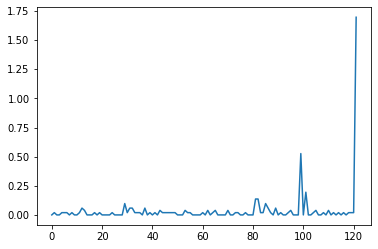

In [6]:
distances = dbscan.eps_distances(n_neighbors=2)
plt.plot(distances)

In [7]:
dbscan.fit(eps=0.3, metric="euclidean", min_samples=20, n_jobs=-1)

clusters = dbscan.detect_clusters()
print(clusters)

[2020-01-29 19:48:49,136 INFO    ] [base_dbscan.py:141 - detect_clusters()] Estimated number of clusters: 2
[2020-01-29 19:48:49,137 INFO    ] [base_dbscan.py:142 - detect_clusters()] Estimated number of noise points: 2
[ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0  1  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0 -1]


In [8]:
outlier_dates, outlier_values = dbscan.outlier_report()

In [9]:
title = "Weekly Game Score Average"
xlabel = "Date"
ylabel = "Avg. Score"

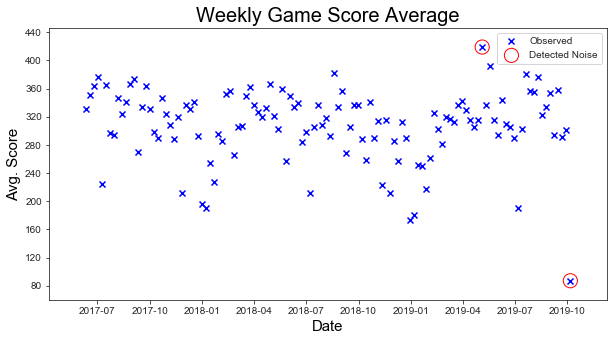

In [10]:
fig, ax = plot_noise(dbscan, title, xlabel, ylabel)

[2020-01-29 19:49:28,712 INFO    ] [base_dbscan.py:141 - detect_clusters()] Estimated number of clusters: 2
[2020-01-29 19:49:28,713 INFO    ] [base_dbscan.py:142 - detect_clusters()] Estimated number of noise points: 2


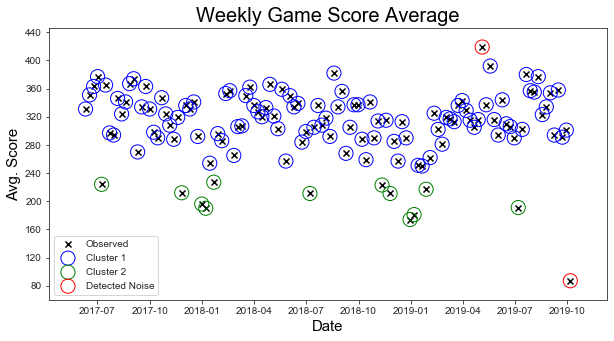

In [11]:
fig, ax = plot_clusters(dbscan, title, xlabel, ylabel)